<a href="https://colab.research.google.com/github/saksham704/Waste/blob/main/Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Preview:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,45,M,LOW,NORMAL,13.093,drugC
2,35,M,NORMAL,HIGH,10.114,drugX
3,61,F,LOW,NORMAL,7.798,drugY
4,50,F,HIGH,HIGH,18.043,drugY



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          10 non-null     int64  
 1   Sex          10 non-null     object 
 2   BP           10 non-null     object 
 3   Cholesterol  10 non-null     object 
 4   Na_to_K      10 non-null     float64
 5   Drug         10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes

Missing Values:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Summary Statistics:


,Age,Sex,BP,Cholesterol,Na_to_K
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43.200000,0.500000,0.900000,0.500000,14.505000
std,11.923832,0.527046,0.875595,0.527046,5.272739
min,23.000000,0.000000,0.000000,0.000000,7.798000
25%,35.750000,0.000000,0.000000,0.000000,10.587000
50%,42.500000,0.500000,1.000000,0.500000,13.856500
75%,49.250000,1.000000,1.750000,1.000000,17.372250
max,61.000000,1.000000,2.000000,1.000000,25.355000


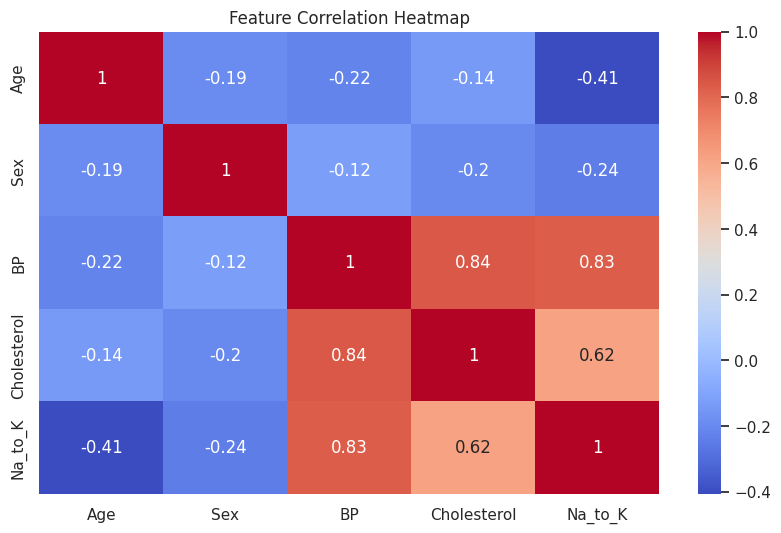

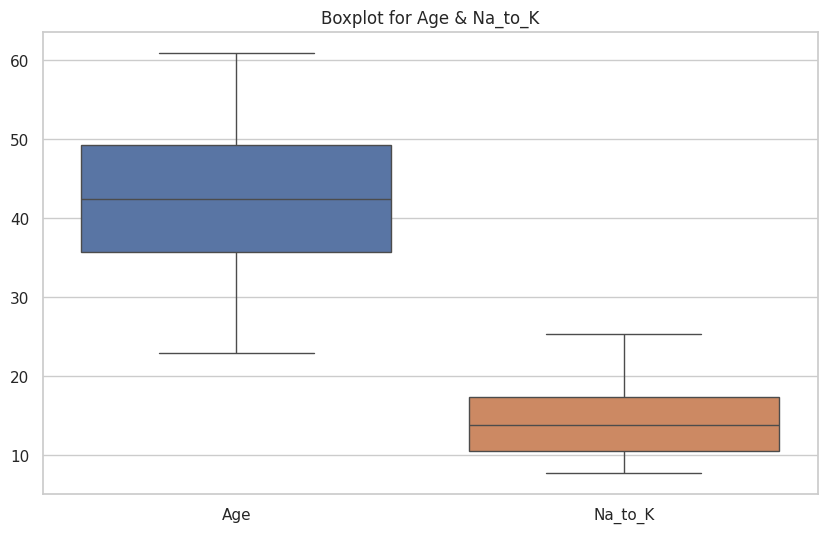

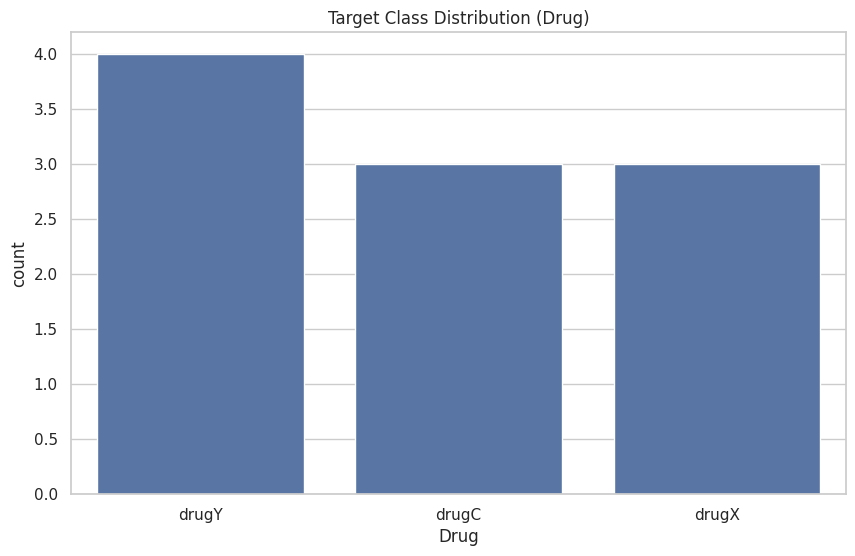

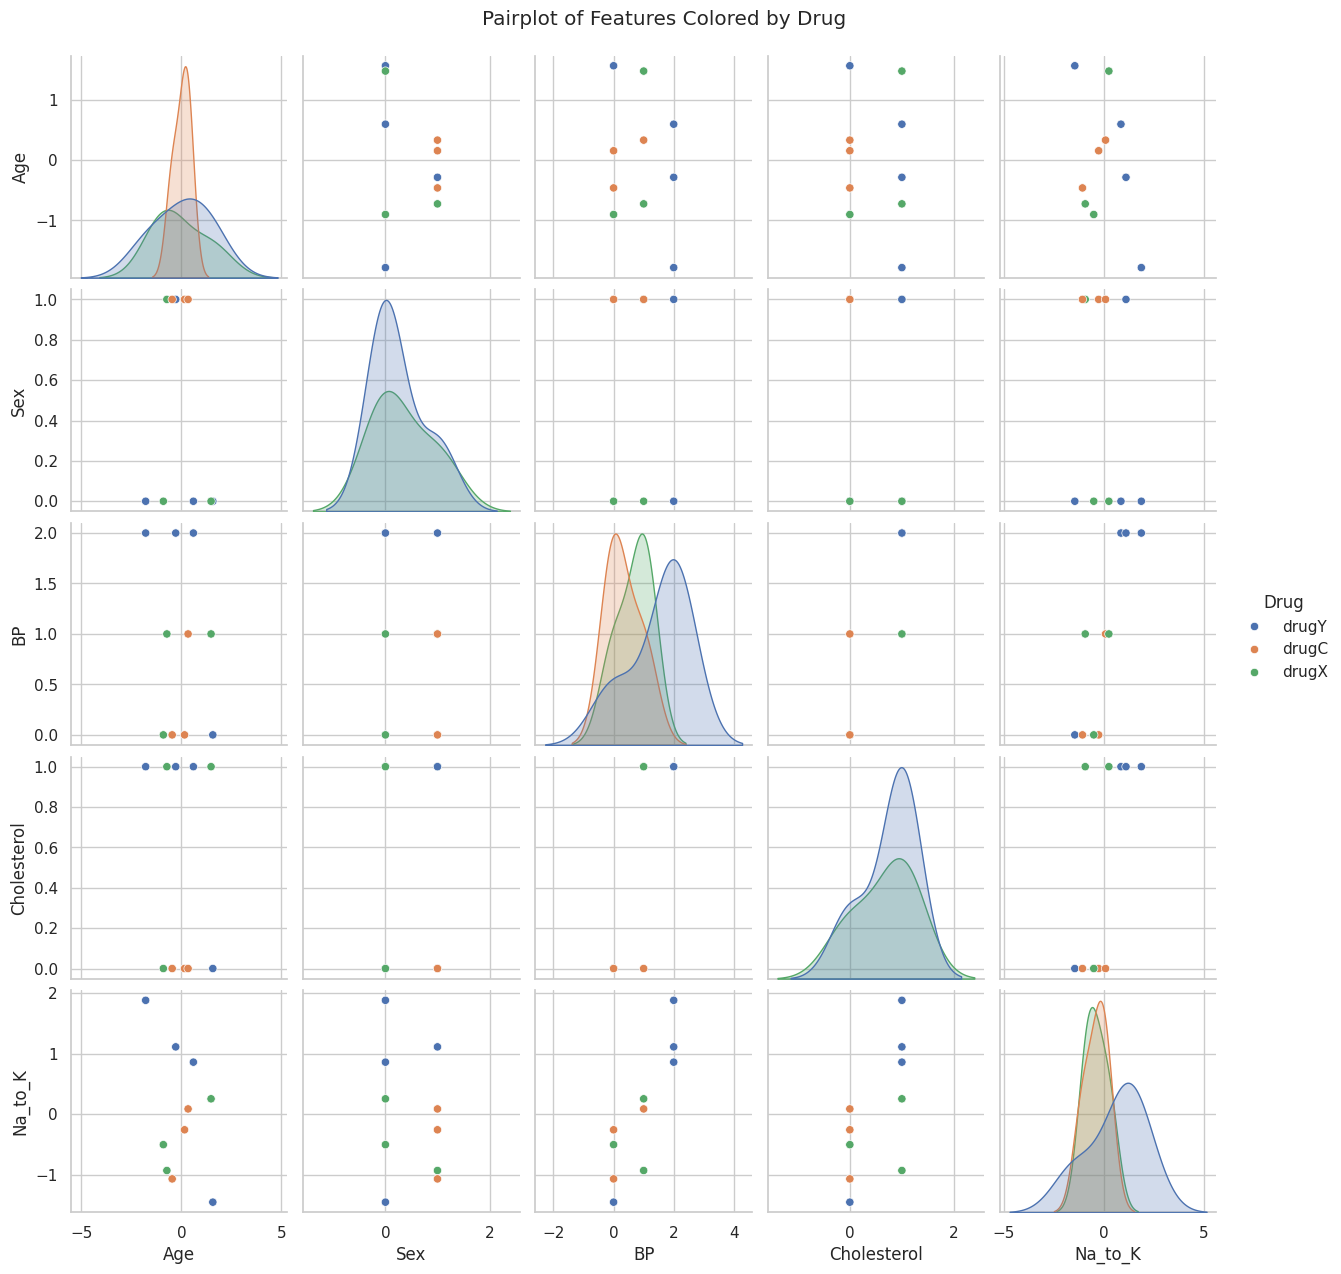


Cleaned Dataset Preview:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.785724,0,2,1,1.880668,drugY
1,0.159124,1,0,0,-0.255508,drugC
2,-0.724898,1,1,1,-0.927157,drugX
3,1.573558,0,0,0,-1.449325,drugY
4,0.601135,0,2,1,0.860524,drugY


In [3]:
# --------------------------------------------
# Drug Classification - Data Preprocessing & EDA
# --------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 2. Load the Dataset
df = pd.read_csv('drug200.csv')  # Update path as needed
print("Initial Dataset Preview:")
display(df.head())

# 3. Dataset Info & Missing Values
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# Optional: Fill missing numeric values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# 4. Data Cleaning - Convert Categorical to Numeric
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

# Drop Duplicates
df.drop_duplicates(inplace=True)

# 5. Summary Statistics
print("\nSummary Statistics:")
display(df.describe())

# 6. Correlation Matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 7. Outlier Detection
sns.boxplot(data=df[['Age', 'Na_to_K']])
plt.title("Boxplot for Age & Na_to_K")
plt.show()

# Cap outliers at 95th percentile (optional)
q95 = df['Na_to_K'].quantile(0.95)
df['Na_to_K'] = np.where(df['Na_to_K'] > q95, q95, df['Na_to_K'])

# 8. Feature Scaling (if needed)
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

# 9. Target Distribution
sns.countplot(x='Drug', data=df)
plt.title("Target Class Distribution (Drug)")
plt.show()

# 10. Pair Plot
sns.pairplot(df, hue='Drug')
plt.suptitle("Pairplot of Features Colored by Drug", y=1.02)
plt.show()

# 11. Final Cleaned Dataset Preview
print("\nCleaned Dataset Preview:")
display(df.head())

# Optionally, save cleaned data
# df.to_csv("cleaned_drug_data.csv", index=False)


# New Section

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
import pandas as pd

# Sample drug classification dataset
data = {
    'Age': [23, 45, 35, 61, 50, 47, 33, 40, 60, 38],
    'Sex': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M'],
    'BP': ['HIGH', 'LOW', 'NORMAL', 'LOW', 'HIGH', 'NORMAL', 'LOW', 'HIGH', 'NORMAL', 'LOW'],
    'Cholesterol': ['HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL'],
    'Na_to_K': [25.355, 13.093, 10.114, 7.798, 18.043, 14.62, 12.006, 19.161, 15.36, 9.5],
    'Drug': ['drugY', 'drugC', 'drugX', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY', 'drugX', 'drugC']
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('drug200.csv', index=False)

# Preview
print("Sample dataset 'drug200.csv' created successfully.")
df.head()

Sample dataset 'drug200.csv' created successfully.


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,45,M,LOW,NORMAL,13.093,drugC
2,35,M,NORMAL,HIGH,10.114,drugX
3,61,F,LOW,NORMAL,7.798,drugY
4,50,F,HIGH,HIGH,18.043,drugY


In [6]:
# 2. Load the Dataset
df = pd.read_csv('drug200.csv')  # Update path as needed
print("Initial Dataset Preview:")
display(df.head())


Initial Dataset Preview:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,45,M,LOW,NORMAL,13.093,drugC
2,35,M,NORMAL,HIGH,10.114,drugX
3,61,F,LOW,NORMAL,7.798,drugY
4,50,F,HIGH,HIGH,18.043,drugY


In [7]:
# 3. Dataset Info & Missing Values
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          10 non-null     int64  
 1   Sex          10 non-null     object 
 2   BP           10 non-null     object 
 3   Cholesterol  10 non-null     object 
 4   Na_to_K      10 non-null     float64
 5   Drug         10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes

Missing Values:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [10]:
# 4. Data Cleaning - Convert Categorical to Numeric
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
# Drop Duplicates
df.drop_duplicates(inplace=True)


In [11]:

# 5. Summary Statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Age,Sex,BP,Cholesterol,Na_to_K
count,10.000000,0.0,0.0,0.0,10.000000
mean,43.200000,NaN,NaN,NaN,14.505000
std,11.923832,NaN,NaN,NaN,5.272739
min,23.000000,NaN,NaN,NaN,7.798000
25%,35.750000,NaN,NaN,NaN,10.587000
50%,42.500000,NaN,NaN,NaN,13.856500
75%,49.250000,NaN,NaN,NaN,17.372250
max,61.000000,NaN,NaN,NaN,25.355000


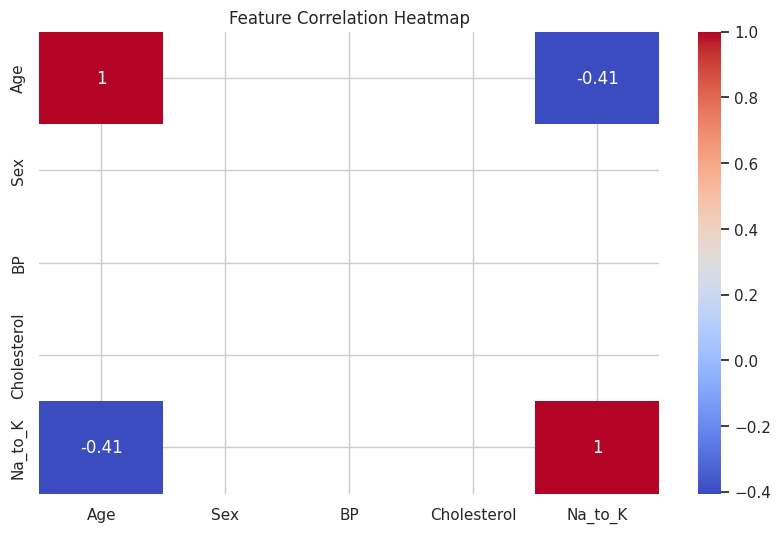

In [14]:
# 6. Correlation Matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

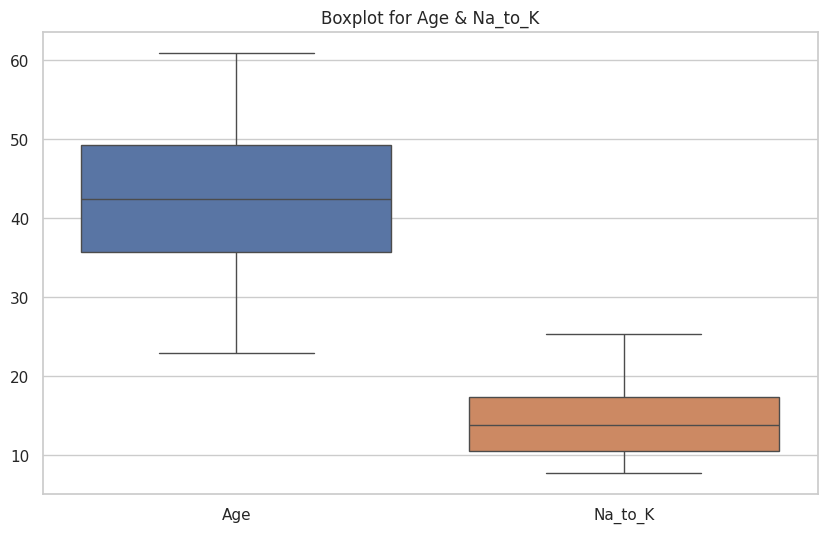

In [16]:
# 7. Outlier Detection
sns.boxplot(data=df[['Age', 'Na_to_K']])
plt.title("Boxplot for Age & Na_to_K")
plt.show()
# Cap outliers at 95th percentile (optional)
q95 = df['Na_to_K'].quantile(0.95)
df['Na_to_K'] = np.where(df['Na_to_K'] > q95, q95, df['Na_to_K'])

In [17]:
# 8. Feature Scaling (if needed)
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

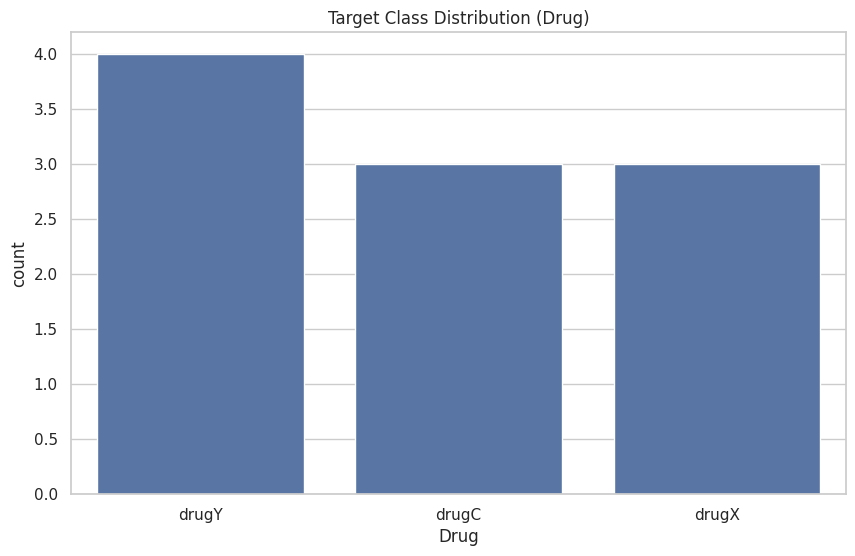

In [18]:
# 9. Target Distribution
sns.countplot(x='Drug', data=df)
plt.title("Target Class Distribution (Drug)")
plt.show()

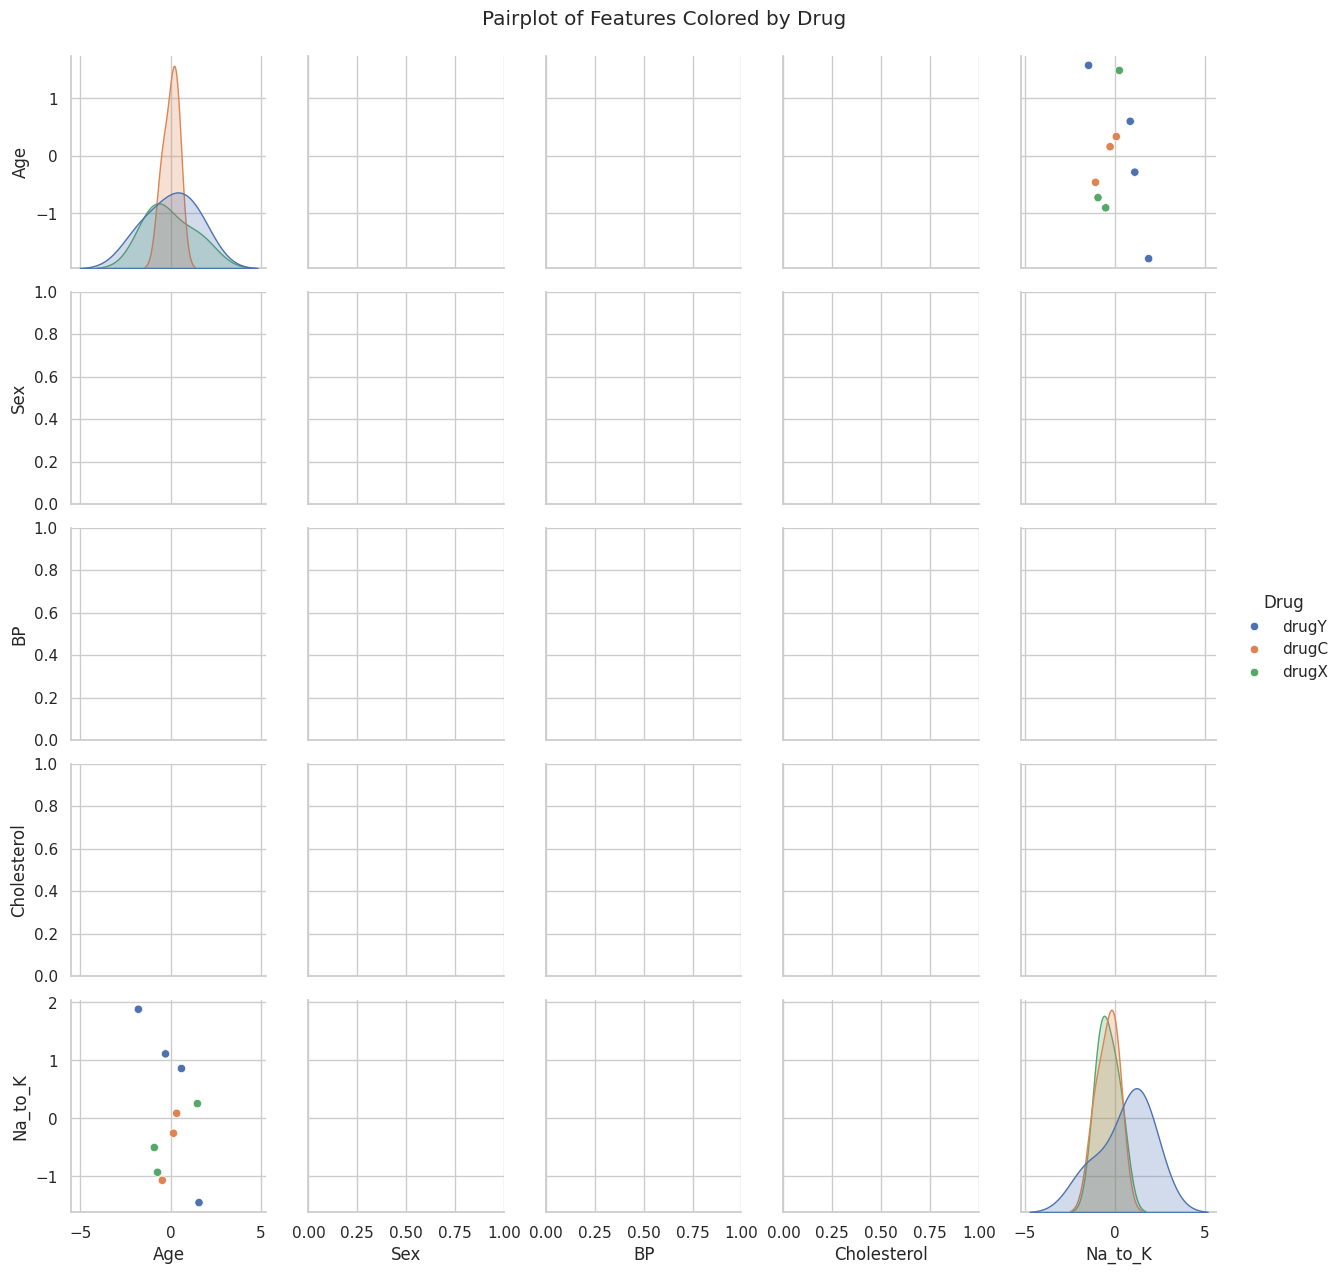

In [19]:
# 10. Pair Plot
sns.pairplot(df, hue='Drug')
plt.suptitle("Pairplot of Features Colored by Drug", y=1.02)
plt.show()